### **Prediksi Harga Rumah di Amsterdam**

**Latar Belakang**:

Penentuan harga rumah sering kali menjadi sebuah tantangan sendiri di Amsterdam. Pasalnya, ada banyak parameter yang harus dipertimbangkan seperti luas tanah, luas bangunan, dsb. yang kadang kala membuat penentuan harga tidak akurat sehingga kadangkala terlalu mahal atau terlalu murah. Jika terlalu mahal akan merugikan konsumen namun jika terlalu murah maka merugikan developer. Untuk itu, dibutuhkan model agar dapat memprediksi harga rumah berdasarkan data sebelumnya.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Dataset yang digunakan mengandung 21.613 baris dan 21 kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Tidak ada missing values pada data, paling tidak berdasarkan dari apa yang terlihat dan terbaca oleh Pandas. Namun, ada hal yang sedikit menggelitik bahwa kolom `bathrooms` dan `floors` bertipe data `float64` yang seharusnya `int64`. Oleh karena itu, harus dicek terlebih dahulu kedua kolom tersebut secara detail.

In [ ]:
print('Untuk mempermudah, kita lihat unique value untuk memastikan isian dari datanya (Hati-hati bahwa jumlah nilainya akan sangat banyak!)')

data['bathrooms'].unique()

Untuk mempermudah, kita lihat unique value untuk memastikan isian dari datanya (Hati-hati bahwa jumlah nilainya akan sangat banyak!)


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Ada jumlah kamar mandi 2.25, 4.5, dst dan ini tidak masuk akal sehingga perlu diganti angkanya ke bilangan bulat dengan pembulatan keatas.

In [ ]:
data['bathrooms'] = np.ceil(data['bathrooms'])
data['bathrooms'].unique()

array([1., 3., 2., 5., 4., 0., 6., 7., 8.])

data jumlah kamar mandi sudah terganti dengan nilai yang sesuai. lalu, bagaimana dengan kolom `floors`?

In [ ]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

Ternyata, ada jumlah lantai yang bukan bilangan bulat seperti 1.5, 2.5, dan 3.5. Ini semestinya bukan anomali mengingat ada rumah yang bertipe mezanine dimana ada setengah lantai yang dibangun dalam satu lantai yang sama sehingga hal ini tidak perlu diubah lagi.

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.439273,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.923593,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,3.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,3.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data['year'] = pd.to_datetime(data['date']).dt.year
new_data = data.drop(columns=['date','id','zipcode','sqft_living15','sqft_lot15'])
new_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,2014
1,538000.0,3,3.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,2014
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2015
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,2014
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,2015


In [ ]:
num_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','year']
cat_cols = ['waterfront','view','condition','grade']

### Numerical Data Preprocessing

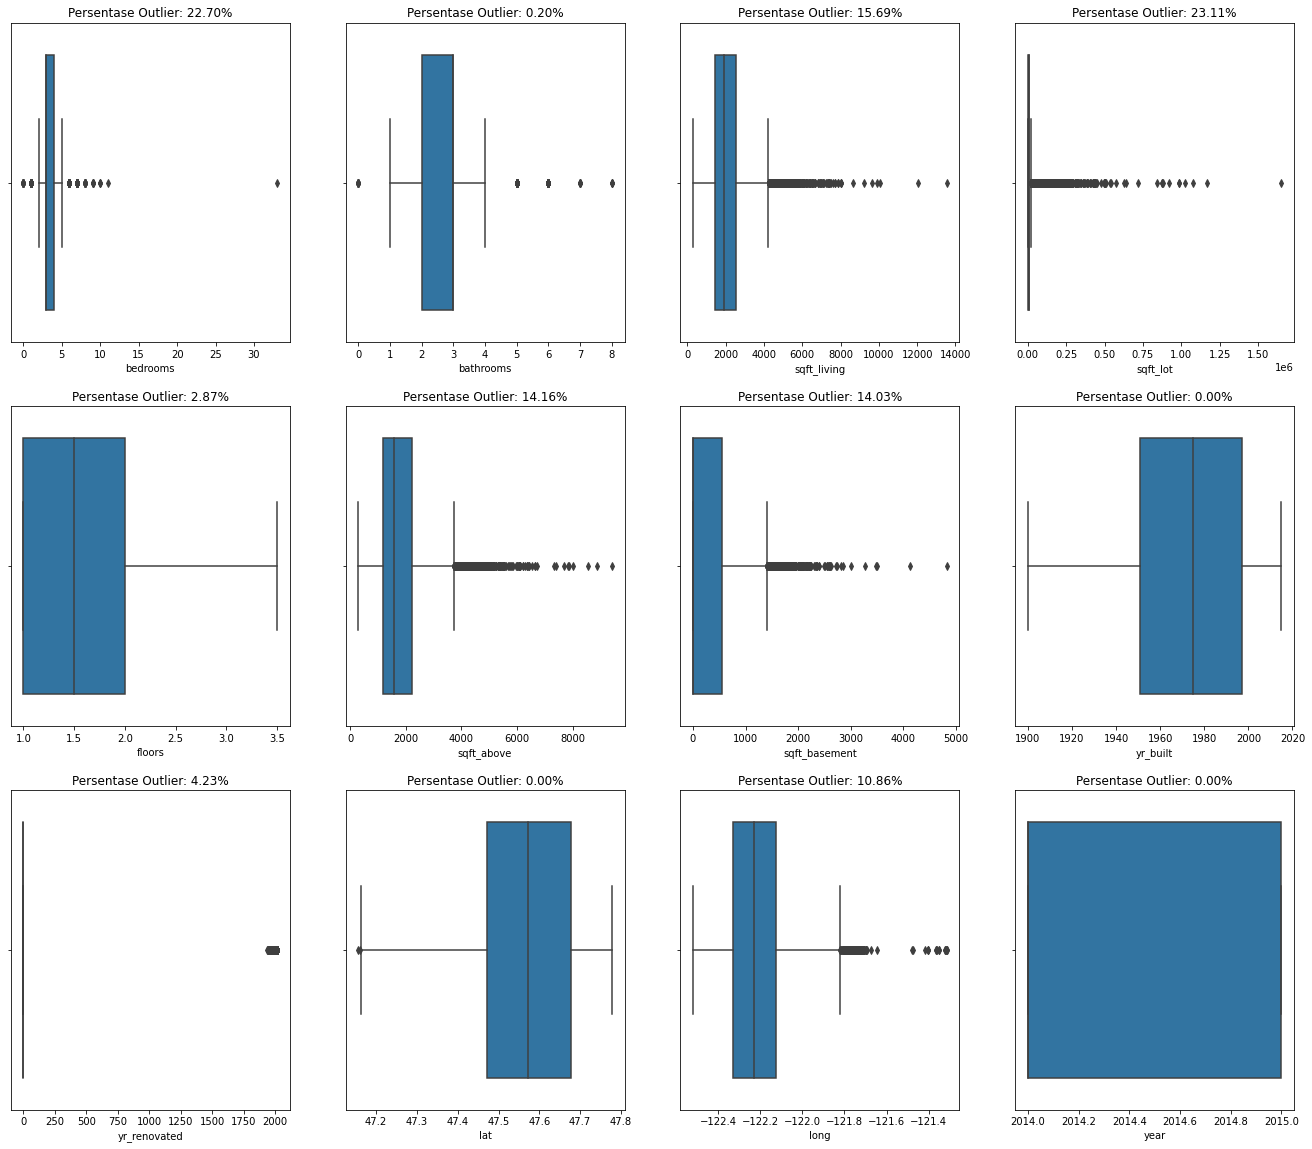

In [ ]:
warnings.filterwarnings("ignore")

def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]

  return outliers,no_outliers, upper, lower

fig, ax = plt.subplots(ncols=4,nrows=3,figsize=(23,20))
x=0
for i in range(3):
  for j in range(4):
    try:
      out,no_out, up, low = outlier_analysis(new_data,num_cols[x])
      sns.boxplot(new_data[num_cols[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(data)))
      x+=1
    except:
      pass
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_data, train_size=0.8)

In [ ]:
new_train = train.copy()
cols= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','year']
for col in cols:
  out,no_out, up, low = outlier_analysis(new_train,col)
  pct_out = len(out)*100/len(train)

  if pct_out<=15:
    new_train = new_train[(new_train[col]>=low) & (new_train[col]<=up)]
  else:
    new_train[col] = new_train[col].apply(lambda x: up if x>=up else low if x<=low else x)

print(f"Jumlah data train sebelum outlier handling: {len(train)}")
print(f"Jumlah data train setelah outlier handling: {len(new_train)}")

Jumlah data train sebelum outlier handling: 17290
Jumlah data train setelah outlier handling: 12179


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
norm = 0
nonorm = 0
for col in num_cols:
  if train[col].skew() >=-0.5 and train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [ ]:
num_train_scaled = pd.DataFrame(scaler.fit_transform(new_train[num_cols]))
num_test_scaled = pd.DataFrame(scaler.transform(test[num_cols]))

In [ ]:
X_train = pd.concat([num_train_scaled,new_train[cat_cols].reset_index(drop=True)],axis=1)
X_test = pd.concat([num_test_scaled,test[cat_cols].reset_index(drop=True)],axis=1)

y_train = new_train['price']
y_test = test['price']

In [ ]:
from sklearn.svm import SVR
from time import time

model = SVR(kernel='linear', C=0.1, epsilon=0.01)

start = time()
model.fit(X_train,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 3.7265625 detik


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 148796.51649750088
R2 Score: -0.03419733511352341


==================== TEST ====================
Mean absolute error: 231705.4365528687
R2 Score: -0.13431258859798567


In [ ]:
from sklearn.svm import SVR
from time import time

model = SVR(kernel='poly', degree=3, C=0.1, epsilon=0.01)

start = time()
model.fit(X_train,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 4.20717453956604 detik


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 148954.91462908994
R2 Score: -0.035899406349145346


==================== TEST ====================
Mean absolute error: 231937.26316925455
R2 Score: -0.13591863763423095


In [ ]:
from sklearn.svm import SVR
from time import time

model = SVR(kernel='rbf', gamma=0.5, C=1, epsilon=1.5)

start = time()
model.fit(X_train,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 7.14994215965271 detik


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 148792.46913011392
R2 Score: -0.034631048943986276


==================== TEST ====================
Mean absolute error: 231856.95702326827
R2 Score: -0.13621971712971992
